In this project I will be analyzing fictious data regarding healthcare insurance. This dataset has information on patients, doctors, the hospital of admission, and the insurance provider. 
I will perform data cleaning, data manipulation, exploratory data analysis and data visualizations, searching for trends and patterns that can be used to provide further insights. This dataset was retrieved from the Kaggle website.

### Importing Libraries And Setting Options Needed For Analysis

In [1]:
import numpy as np  # For numerical computation
import pandas as pd # For reading in data and for data manipulation
pd.set_option("display.max_columns", None)  # For ensuring all columns are visible 
import matplotlib.pyplot as plt # For visualizing data
from matplotlib import style    # For additional customization of visuals
%matplotlib inline  
import seaborn as sns   # For enhanced visualizations 

### Reading In Data From CSV File To Dataframe

In [2]:
# Defining a variable that I will use to call the loaded data
healthcare = pd.read_csv(r"C:\Users\Jason\OneDrive\healthcare_dataset.csv")
# healthcare = pd.read_csv(r"C:\Users\mjaso\OneDrive\healthcare_dataset.csv")

### Viewing The First 3 Rows Of Data 

In [3]:
# Getting a look at the first few rows to compare with the last few rows
healthcare.head(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal


### Viewing The Last 3 Rows Of Data

In [4]:
# Making sure the last few rows are consistent with the first few rows
healthcare.tail(3)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal
9999,Eric King,20,Male,B-,Arthritis,2023-03-22,Tasha Avila,"Torres, Young and Stewart",Aetna,37223.965865,290,Emergency,2023-04-15,Penicillin,Abnormal


### Checking For Any Duplicated Rows In The Dataset

In [5]:
# To get the count of how many duplicated rows of data 
healthcare.duplicated().sum()

0

### Checking For Any Null Values In The Dataset

In [6]:
# Using a for loop to iterate through all of the columns to check for N/A values
for na in healthcare.columns:
    na_values = healthcare[na].isnull().sum()
    print(f"The column {na} has {na_values} null values") 

The column Name has 0 null values
The column Age has 0 null values
The column Gender has 0 null values
The column Blood Type has 0 null values
The column Medical Condition has 0 null values
The column Date of Admission has 0 null values
The column Doctor has 0 null values
The column Hospital has 0 null values
The column Insurance Provider has 0 null values
The column Billing Amount has 0 null values
The column Room Number has 0 null values
The column Admission Type has 0 null values
The column Discharge Date has 0 null values
The column Medication has 0 null values
The column Test Results has 0 null values


### Checking For Unique Values In Dataset

In [7]:
# Utilizing a for loop to iterate through all of the columns to check the count of unique values per column
for col in healthcare.columns:
    unique_values = healthcare[col].nunique()
    print(f"The column {col} has {unique_values} unique values")

The column Name has 9378 unique values
The column Age has 68 unique values
The column Gender has 2 unique values
The column Blood Type has 8 unique values
The column Medical Condition has 6 unique values
The column Date of Admission has 1815 unique values
The column Doctor has 9416 unique values
The column Hospital has 8639 unique values
The column Insurance Provider has 5 unique values
The column Billing Amount has 10000 unique values
The column Room Number has 400 unique values
The column Admission Type has 3 unique values
The column Discharge Date has 1834 unique values
The column Medication has 5 unique values
The column Test Results has 3 unique values


### Taking A Look At The Size Of The Dataframe

In [8]:
# Getting a glimpse of how many columns and rows are in dataset
healthcare.shape

(10000, 15)

### Checking That Datatypes Are In The Correct Format

In [9]:
# To get a quick view of what datatype is associated with each column
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

### Changing Columns With Dates To Correct Datatype

In [10]:
# Updating the 'Date of Admission' and 'Discharge Date' columns from 'object' datatypes to 'datetime' datatypes
healthcare["Date of Admission"] = pd.to_datetime(healthcare["Date of Admission"])
healthcare["Discharge Date"] = pd.to_datetime(healthcare["Discharge Date"])

### Checking That Date Columns Datatypes Have Been Updated

In [11]:
# Viewing the updated columns datatype
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

### Creating New Columns For The Year, Month, Day of Admission and Discharge

In [12]:
healthcare["Admission Year"] = pd.to_datetime(healthcare["Date of Admission"]).dt.year
healthcare["Admission Month"] = pd.to_datetime(healthcare["Date of Admission"]).dt.month_name()
healthcare["Admission Day"] = pd.to_datetime(healthcare["Date of Admission"]).dt.day_name()
healthcare["Discharge Year"] = pd.to_datetime(healthcare["Discharge Date"]).dt.year
healthcare["Discharge Month"] = pd.to_datetime(healthcare["Discharge Date"]).dt.month_name()
healthcare["Discharge Day"] = pd.to_datetime(healthcare["Discharge Date"]).dt.day_name()

### Validating That New Columns Have Been Added

In [13]:
# Checking the columns to see if the new columns have been added
healthcare.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Admission Year', 'Admission Month',
       'Admission Day', 'Discharge Year', 'Discharge Month', 'Discharge Day'],
      dtype='object')

### Minimum/Average/Maximum Ages of Male and Female Patients

In [14]:
# Viewing the min/avg/max ages of all female and male patients
healthcare.groupby("Gender")["Age"].agg(["min", "mean", "max"])

,min,mean,max
Gender,,,
Female,18,51.608473,85
Male,18,51.291168,85


#### Average Age Of Females And Males Bar Chart

The average age of female and male patients is roughly the same at 51 years old


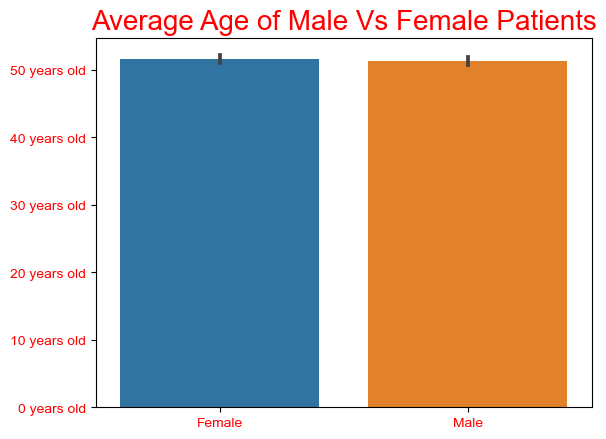

In [15]:
sns.barplot(x="Gender", y="Age", data=healthcare),
plt.title("Average Age of Male Vs Female Patients", color = "red", fontsize=20),
ticks = list(range(0,60,10))
plt.yticks(ticks, [f"{x} years old" for x in ticks], color="red"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="red")
sns.set_style("darkgrid")
style.use("ggplot")
print("The average age of female and male patients is roughly the same at 51 years old")

In [16]:
healthcare["Gender"].value_counts()

Female    5075
Male      4925
Name: Gender, dtype: int64

In [17]:
healthcare["Blood Type"].value_counts()

AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64

### Count Of Blood Types By Gender

In [18]:
healthcare.groupby("Gender")["Blood Type"].value_counts()

Gender  Blood Type
Female  AB-           671
        O+            641
        B+            640
        AB+           637
        B-            635
        A-            633
        A+            629
        O-            589
Male    O-            655
        AB+           621
        B-            617
        A+            612
        O+            607
        A-            605
        AB-           604
        B+            604
Name: Blood Type, dtype: int64

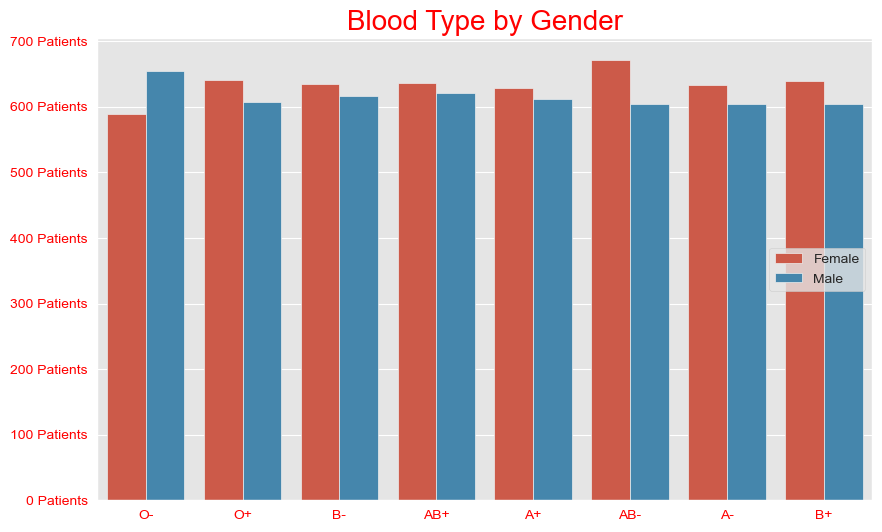

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x="Blood Type", hue="Gender", data=healthcare),
plt.title("Blood Type by Gender", color="red", fontsize=20),
plt.legend(loc=5)
ticks = list(range(0, 800, 100))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xticks(color="red"),
plt.xlabel("")
sns.set_style("darkgrid")
style.use("ggplot")

### Count Of Medical Conditions

In [20]:
healthcare["Medical Condition"].value_counts()

Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64

The highest percentage of all the medical conditions is asthma.


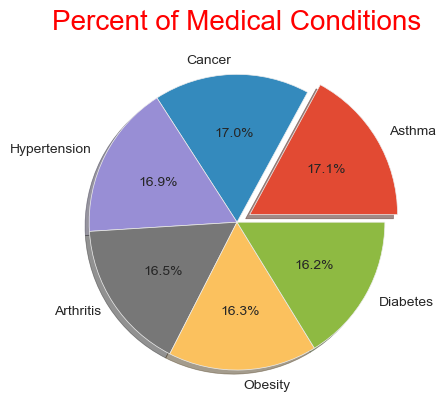

In [21]:
e = [0.1, 0, 0, 0, 0, 0]
healthcare["Medical Condition"].value_counts().plot(kind="pie", shadow=True, autopct="%1.1f%%", explode=e),
plt.title("Percent of Medical Conditions", color="red", fontsize=20),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The highest percentage of all the medical conditions is asthma.")

### Count Of Medical Conditions By Gender

In [22]:
healthcare.groupby("Gender")["Medical Condition"].value_counts()

Gender  Medical Condition
Female  Cancer               887
        Asthma               874
        Obesity              838
        Hypertension         836
        Diabetes             825
        Arthritis            815
Male    Hypertension         852
        Arthritis            835
        Asthma               834
        Cancer               816
        Diabetes             798
        Obesity              790
Name: Medical Condition, dtype: int64

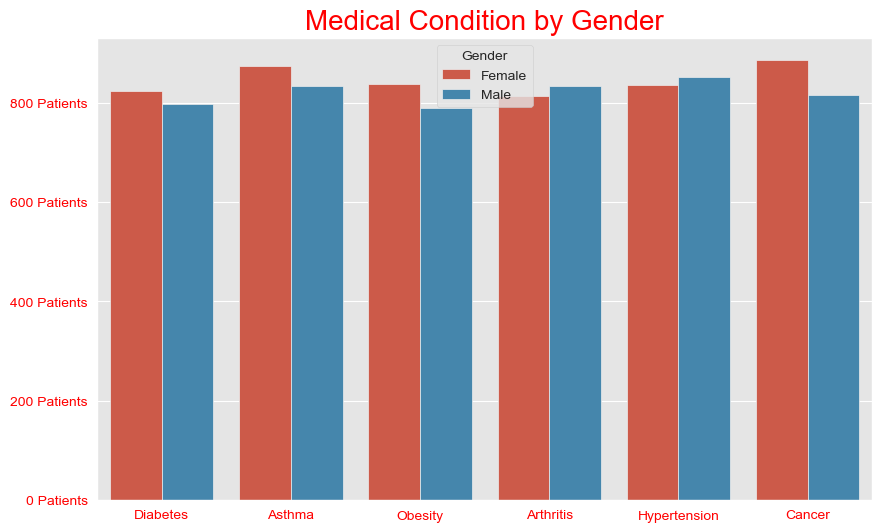

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x="Medical Condition", hue="Gender", data=healthcare),
plt.title("Medical Condition by Gender", color="red", fontsize=20),
ticks = list(range(0,1000,200))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="red")
style.use("ggplot")

### Count Of Insurance Providers

In [24]:
healthcare["Insurance Provider"].value_counts()

Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64

The highest percentage of all Insurance Providers is Cigna


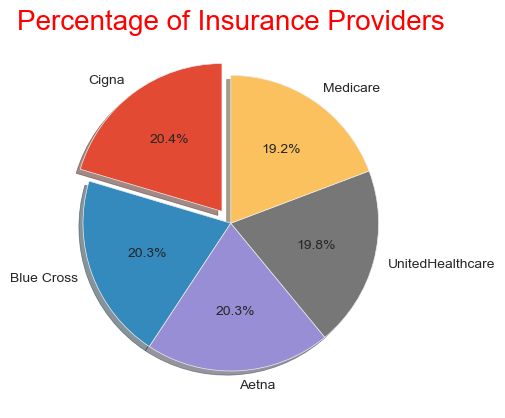

In [25]:
e = [0.1, 0, 0, 0, 0]
healthcare["Insurance Provider"].value_counts().plot(kind="pie", shadow=True, explode=e, startangle=90, autopct="%1.1f%%"),
plt.title("Percentage of Insurance Providers", fontsize=20, color="red"),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The highest percentage of all Insurance Providers is Cigna")

### Count Of Insuranc Providers By Gender

In [26]:
healthcare.groupby("Gender")["Insurance Provider"].value_counts()

Gender  Insurance Provider
Female  Medicare              1035
        Cigna                 1034
        Aetna                 1012
        UnitedHealthcare      1009
        Blue Cross             985
Male    Blue Cross            1047
        Aetna                 1013
        Cigna                 1006
        UnitedHealthcare       969
        Medicare               890
Name: Insurance Provider, dtype: int64

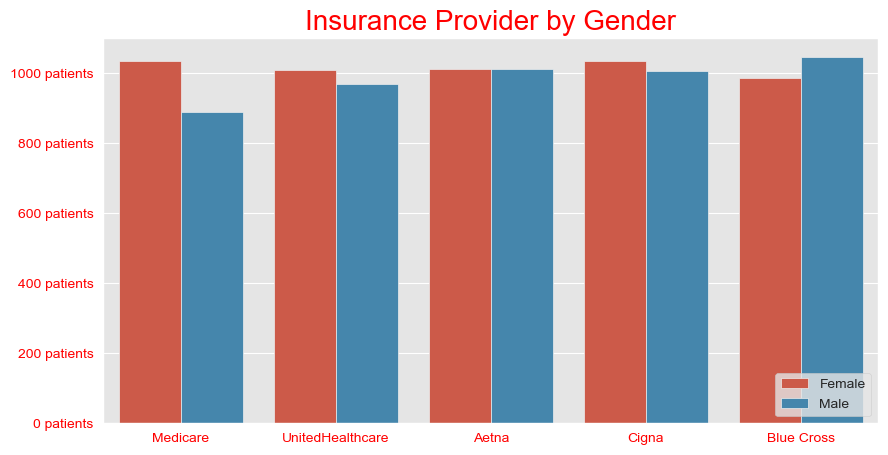

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=healthcare, x="Insurance Provider", hue="Gender"),
plt.title("Insurance Provider by Gender", color="red", fontsize=20),
plt.legend(loc=4)
ticks = list(range(0,1100,200))
plt.yticks(ticks, [f"{x} patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="red"),
sns.set_style("darkgrid"), 
style.use("ggplot")

### Count of Admission Types

In [28]:
healthcare["Admission Type"].value_counts()

Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64

The highest percentage of Admission Types is Urgent.


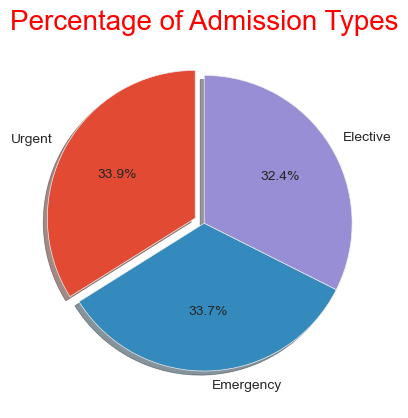

In [29]:
e = [0.07, 0, 0]
healthcare["Admission Type"].value_counts().plot(kind="pie", startangle=90, shadow=True, explode=e, autopct="%1.1f%%"),
plt.title("Percentage of Admission Types", color="red", fontsize=20), 
plt.ylabel(""),
print("The highest percentage of Admission Types is Urgent.")

### Count Of Admission Type By Gender

In [30]:
healthcare.groupby("Gender")["Admission Type"].value_counts()

Gender  Admission Type
Female  Urgent            1734
        Emergency         1701
        Elective          1640
Male    Emergency         1666
        Urgent            1657
        Elective          1602
Name: Admission Type, dtype: int64

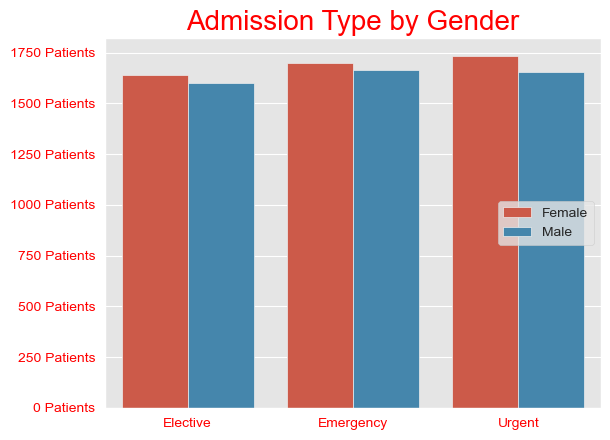

In [31]:
sns.countplot(data=healthcare, x="Admission Type", hue="Gender"),
plt.title("Admission Type by Gender", color="red", fontsize=20),
plt.legend(loc=5),
ticks = list(range(0,1800,250))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""), 
plt.xlabel(""),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot")

### Count Of Test Results

In [32]:
healthcare["Test Results"].value_counts()

Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64

The highest percentage of Test Results are Abnormal.


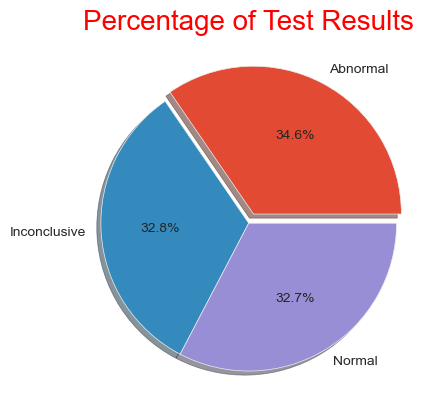

In [33]:
e = [0.07, 0, 0]
healthcare["Test Results"].value_counts().plot(kind="pie", shadow=True, autopct="%1.1f%%", explode=e),
plt.title("Percentage of Test Results", color="red", fontsize=20),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The highest percentage of Test Results are Abnormal.")

### Count Of Test Results By Gender

In [34]:
healthcare.groupby("Gender")["Test Results"].value_counts()

Gender  Test Results
Female  Abnormal        1716
        Inconclusive    1696
        Normal          1663
Male    Abnormal        1740
        Normal          1604
        Inconclusive    1581
Name: Test Results, dtype: int64

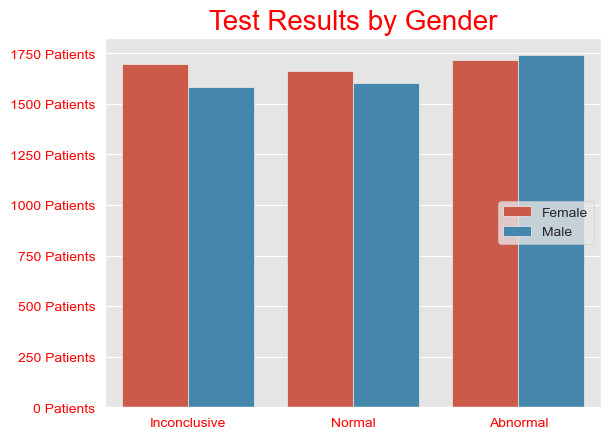

In [35]:
sns.countplot(data=healthcare, x="Test Results", hue="Gender"),
plt.title("Test Results by Gender", color="red", fontsize=20),
plt.legend(loc=5),
ticks = list(range(0,1800,250))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot")

### Count Of Medication

In [36]:
healthcare["Medication"].value_counts()

Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: Medication, dtype: int64

The highest Medication prescribed is Penicillin.


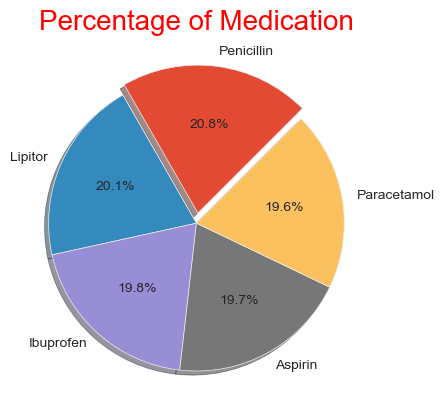

In [37]:
e = [0.07, 0, 0, 0,0]
healthcare["Medication"].value_counts().plot(kind="pie", autopct="%1.1f%%", shadow=True, explode=e, startangle=45),
plt.title("Percentage of Medication", color="red", fontsize=20),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The highest Medication prescribed is Penicillin.")

### Count Of Medication By Gender

In [38]:
healthcare.groupby("Gender")["Medication"].value_counts()

Gender  Medication 
Female  Penicillin     1027
        Paracetamol    1022
        Lipitor        1016
        Aspirin        1011
        Ibuprofen       999
Male    Penicillin     1052
        Lipitor         999
        Ibuprofen       977
        Aspirin         957
        Paracetamol     940
Name: Medication, dtype: int64

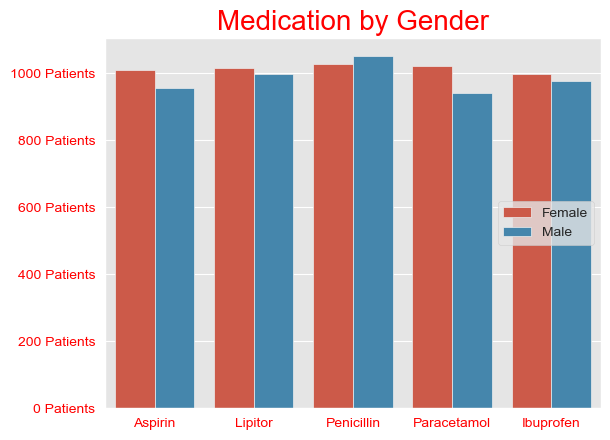

In [39]:
sns.countplot(data=healthcare, x="Medication", hue="Gender"),
plt.title("Medication by Gender", color="red", fontsize=20),
plt.legend(loc=5),
ticks = list(range(0,1200,200))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot")

### Count Of Patients By Admission Year

In [40]:
healthcare["Admission Year"].value_counts()

2021    2063
2020    2044
2022    2001
2019    1973
2023    1616
2018     303
Name: Admission Year, dtype: int64

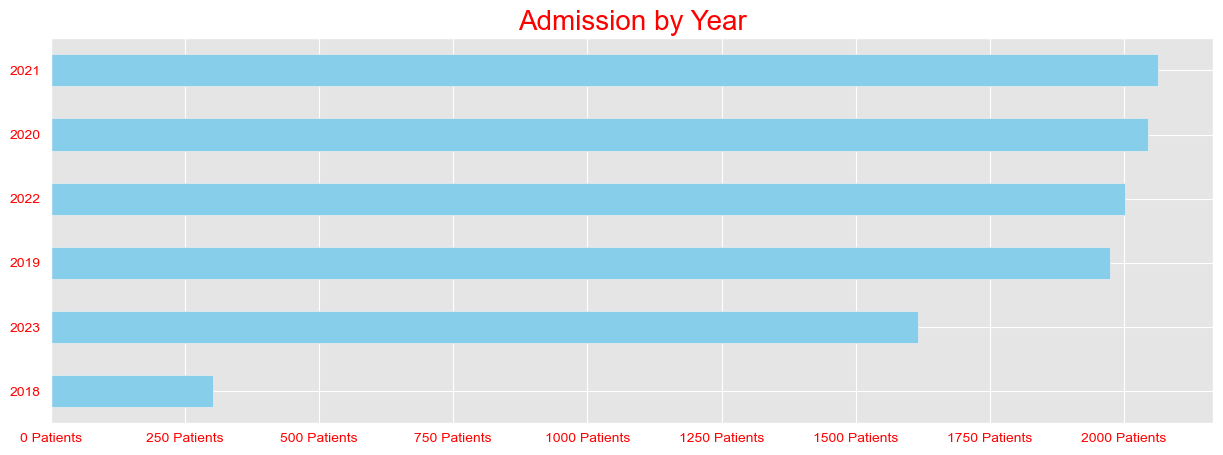

In [41]:
plt.figure(figsize=(15,5))
healthcare["Admission Year"].value_counts().sort_values(ascending=True).plot(kind="barh",color="skyblue"),
plt.title("Admission by Year", color="red", fontsize=20),
ticks = list(range(0,2225,250))
plt.xticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.yticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot")

### Count Of Admission Year By Gender

In [42]:
healthcare.groupby("Gender")["Admission Year"].value_counts()

Gender  Admission Year
Female  2021              1073
        2020              1021
        2022              1013
        2019              1008
        2023               788
        2018               172
Male    2020              1023
        2021               990
        2022               988
        2019               965
        2023               828
        2018               131
Name: Admission Year, dtype: int64

(None,)

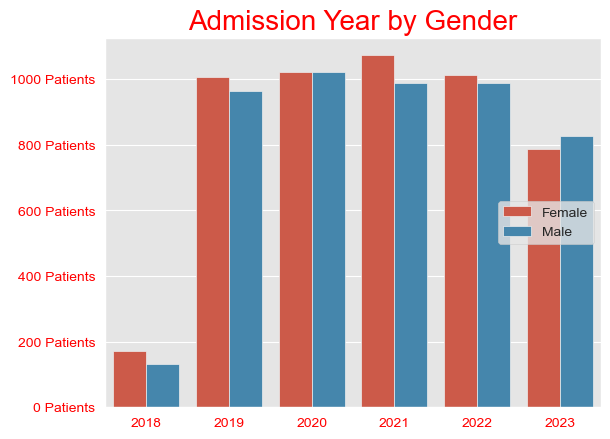

In [43]:
sns.countplot(data=healthcare, x="Admission Year", hue="Gender"),
plt.title("Admission Year by Gender", color="red", fontsize=20),
plt.legend(loc=5),
ticks = list(range(0,1100,200))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xticks(color="red"),
plt.xlabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),

### Count Of Patients By Admission Month

In [44]:
healthcare["Admission Month"].value_counts()

October      883
March        850
August       845
December     843
May          842
April        841
January      837
June         833
July         827
November     820
September    801
February     778
Name: Admission Month, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


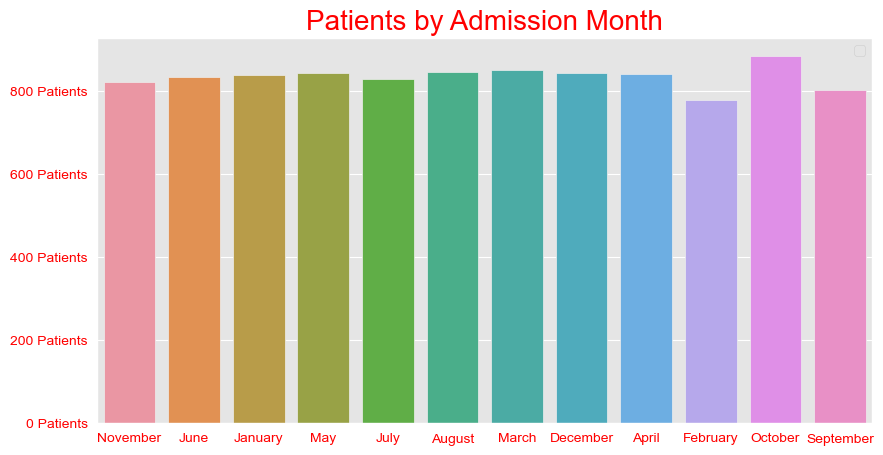

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(data=healthcare, x="Admission Month"),
plt.title("Patients by Admission Month", color="red", fontsize=20),
plt.legend(),
ticks = list(range(0,1000,200))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot")

### Count Of Admission Month By Gender

In [46]:
healthcare.groupby("Gender")["Admission Month"].value_counts()

Gender  Admission Month
Female  November           448
        October            447
        April              439
        January            439
        December           437
        August             428
        March              427
        June               412
        May                405
        September          402
        July               396
        February           395
Male    May                437
        October            436
        July               431
        March              423
        June               421
        August             417
        December           406
        April              402
        September          399
        January            398
        February           383
        November           372
Name: Admission Month, dtype: int64

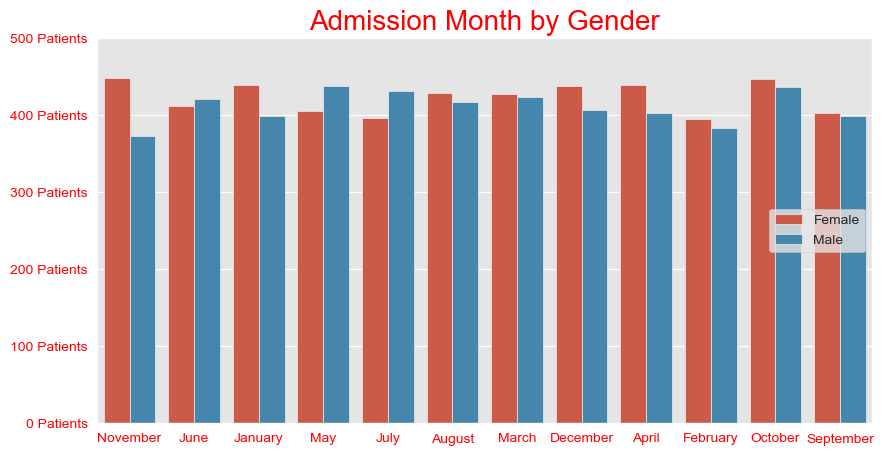

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data=healthcare, x="Admission Month", hue="Gender"),
plt.title("Admission Month by Gender", color="red", fontsize=20),
plt.legend(loc=5),
ticks = list(range(0,600,100))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot")

### Count Of Admission By Day

In [48]:
healthcare["Admission Day"].value_counts()

Thursday     1479
Tuesday      1446
Monday       1440
Wednesday    1434
Friday       1403
Saturday     1402
Sunday       1396
Name: Admission Day, dtype: int64

The highest Admisson Day for patients is Thursday.


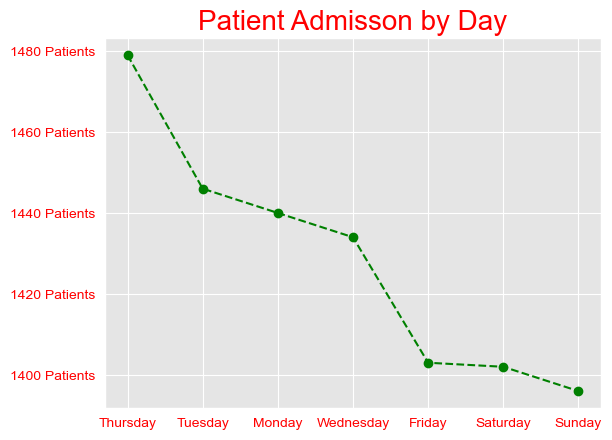

In [49]:
healthcare["Admission Day"].value_counts().plot(kind="line", linestyle="--", marker="o", label="line with marker", color="green"),
plt.title("Patient Admisson by Day", fontsize=20, color="red"),
ticks = list(range(1400,1500,20))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot")
print("The highest Admisson Day for patients is Thursday.")

### Count Of Discharge By Day

In [50]:
healthcare["Discharge Day"].value_counts()

Saturday     1493
Thursday     1458
Sunday       1424
Friday       1423
Monday       1412
Wednesday    1396
Tuesday      1394
Name: Discharge Day, dtype: int64

The day that sees the highest amount of patient discharge is Saturday.


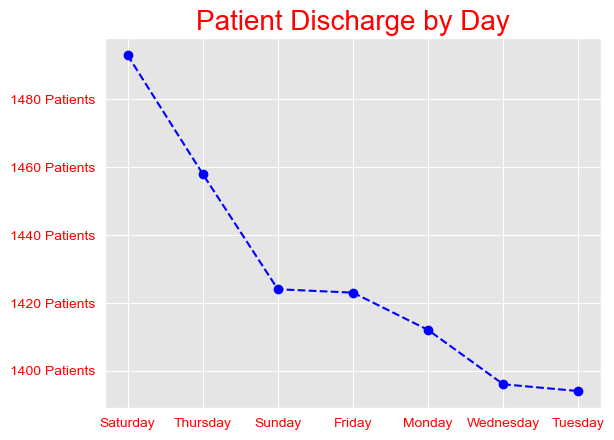

In [51]:
healthcare["Discharge Day"].value_counts().plot(kind="line", linestyle="--", marker="o", label="line with marker", color="blue"),
plt.title("Patient Discharge by Day", fontsize=20, color="red"),
ticks = list(range(1400,1500,20))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The day that sees the highest amount of patient discharge is Saturday.")

### Admission Day By Gender

In [52]:
healthcare.groupby("Gender")["Admission Day"].value_counts()

Gender  Admission Day
Female  Tuesday          754
        Monday           740
        Wednesday        728
        Thursday         726
        Saturday         720
        Sunday           707
        Friday           700
Male    Thursday         753
        Wednesday        706
        Friday           703
        Monday           700
        Tuesday          692
        Sunday           689
        Saturday         682
Name: Admission Day, dtype: int64

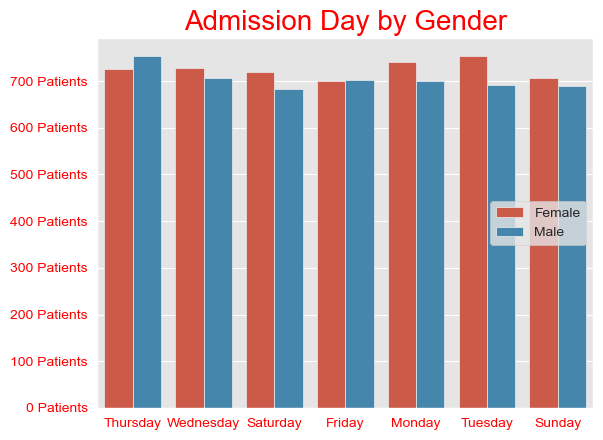

In [53]:
sns.countplot(data=healthcare, x="Admission Day", hue="Gender"),
plt.title("Admission Day by Gender", color="red", fontsize=20),
plt.legend(loc=5),
ticks = list(range(0,800,100))
plt.yticks(ticks, [f"{x} Patients" for x in ticks], color="red"),
plt.ylabel(""),
plt.xlabel(""),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot")

### Billing Amounts By Gender

In [54]:
healthcare.groupby("Gender")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Gender,,,
Female,1000.180837,25484.385085,49985.973068
Male,1004.416897,25550.215933,49995.902283


The minimum, average, and maximum billing amount for males and females are roughly the same amount.


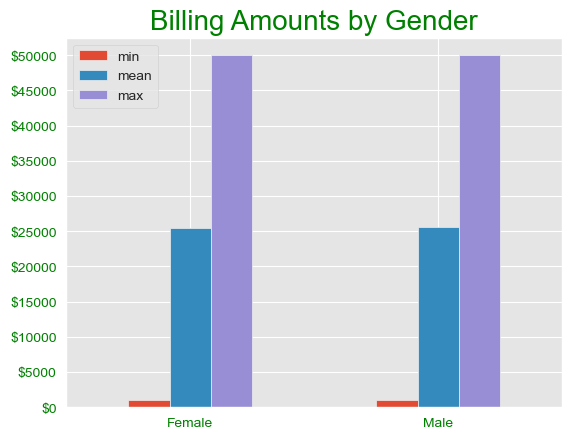

In [87]:
healthcare.groupby("Gender")["Billing Amount"].agg(["min", "mean", "max"]).plot(kind="bar", rot=0),
plt.title("Billing Amounts by Gender", color="green", fontsize=20),
ticks = list(range(0,55000,5000))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xticks(color="green"),
plt.ylabel(""),
plt.xlabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The minimum, average, and maximum billing amount for males and females are roughly the same amount.")

### Billing Amounts By Medical Condition

In [56]:
healthcare.groupby("Medical Condition")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Medical Condition,,,
Arthritis,1009.417327,25187.631255,49985.973068
Asthma,1032.263087,25416.869895,49974.299138
Cancer,1020.337790,25539.096133,49994.984740
Diabetes,1071.456127,26060.116129,49954.968325
Hypertension,1084.422303,25198.033973,49995.902283
Obesity,1000.180837,25720.842683,49974.160458


The minimum, average, and maximum billing amounts by Medical Condition appear to be consistent


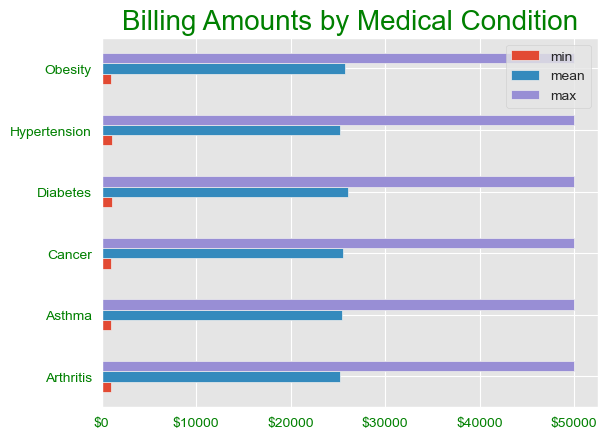

In [86]:
healthcare.groupby("Medical Condition")["Billing Amount"].agg(["min", "mean", "max"]).plot(kind="barh"),
plt.title("Billing Amounts by Medical Condition", fontsize=20, color="green"),
ticks = list(range(0, 60000, 10000))
plt.xticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xlabel(""),
plt.yticks(color="green"),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The minimum, average, and maximum billing amounts by Medical Condition appear to be consistent")

### Billing Amounts by Medical Condition Per Gender

In [58]:
healthcare.groupby(["Gender", "Medical Condition"])["Billing Amount"].agg(["min", "mean", "max"])

min          mean           max
Gender Medical Condition                                         
Female Arthritis          1009.417327  24692.417417  49985.973068
       Asthma             1057.017333  25672.743141  49974.299138
       Cancer             1020.337790  25370.465132  49867.725385
       Diabetes           1205.002345  26369.383481  49932.901816
       Hypertension       1171.420659  25126.230138  49951.261761
       Obesity            1000.180837  25664.778361  49947.562815
Male   Arthritis          1280.553303  25670.983684  49936.073748
       Asthma             1032.263087  25148.724551  49910.077615
       Cancer             1224.768329  25722.399683  49994.984740
       Diabetes           1071.456127  25740.384845  49954.968325
       Hypertension       1084.422303  25268.489378  49995.902283
       Obesity            1004.416897  25780.313444  49974.160458

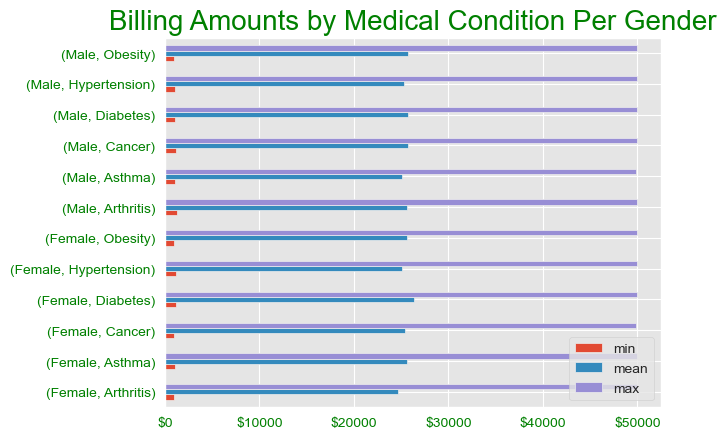

In [85]:
healthcare.groupby(["Gender", "Medical Condition"])["Billing Amount"].agg(["min", "mean", "max"]).plot(kind="barh"),
plt.title("Billing Amounts by Medical Condition Per Gender", fontsize=20, color="green"),
ticks = list(range(0,60000,10000))
plt.xticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xlabel(""),
plt.yticks(color="green"),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot")

### Billing Amounts by Insurance Provider

In [60]:
healthcare.groupby("Insurance Provider")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Insurance Provider,,,
Aetna,1009.417327,25837.923338,49995.902283
Blue Cross,1032.640280,25652.489617,49957.997600
Cigna,1071.456127,25656.946859,49936.073748
Medicare,1000.180837,25002.480429,49985.973068
UnitedHealthcare,1004.416897,25404.685388,49994.984740


##### Minimum Billing Amount By Insurance Provider Per Day

Medicare appears to be the most affordable Insurance Provider by day.


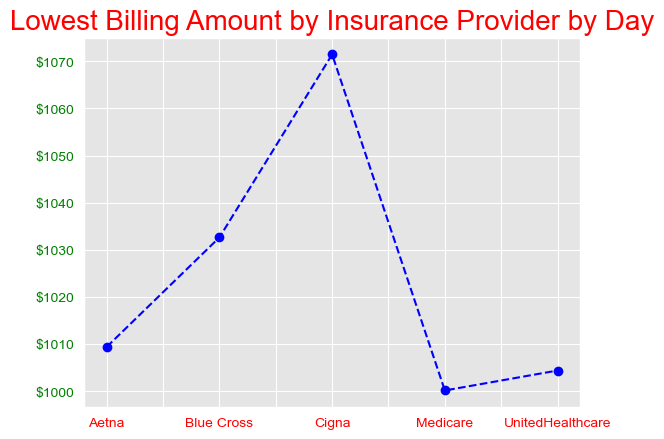

In [61]:
healthcare.groupby("Insurance Provider")["Billing Amount"].min().plot(kind="line", linestyle="--", marker="o", label="line with marker", color="blue"),
plt.title("Lowest Billing Amount by Insurance Provider by Day", color="red", fontsize=20),
ticks = list(range(1000, 1080, 10))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xlabel(""),
plt.xticks(color="red"),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("Medicare appears to be the most affordable Insurance Provider by day.")

### Billing Amounts By Insurance Provider Per Gender

In [62]:
healthcare.groupby(["Gender", "Insurance Provider"])["Billing Amount"].agg(["min", "mean", "max"])

min          mean           max
Gender Insurance Provider                                         
Female Aetna               1009.417327  25334.728962  49974.299138
       Blue Cross          1118.997433  26177.803472  49947.562815
       Cigna               1227.603915  25724.282772  49932.901816
       Medicare            1000.180837  25007.961817  49985.973068
       UnitedHealthcare    1020.337790  25200.419534  49879.160161
Male   Aetna               1032.263087  26340.620978  49995.902283
       Blue Cross          1032.640280  25158.283172  49957.997600
       Cigna               1071.456127  25587.736785  49936.073748
       Medicare            1084.422303  24996.106005  49974.806592
       UnitedHealthcare    1004.416897  25617.383269  49994.984740

##### Minimum Billing Amount By Insurance Provider

Medicare is the most affordable Insurance Provider for females per day and United Health Care is the most affordable for males.


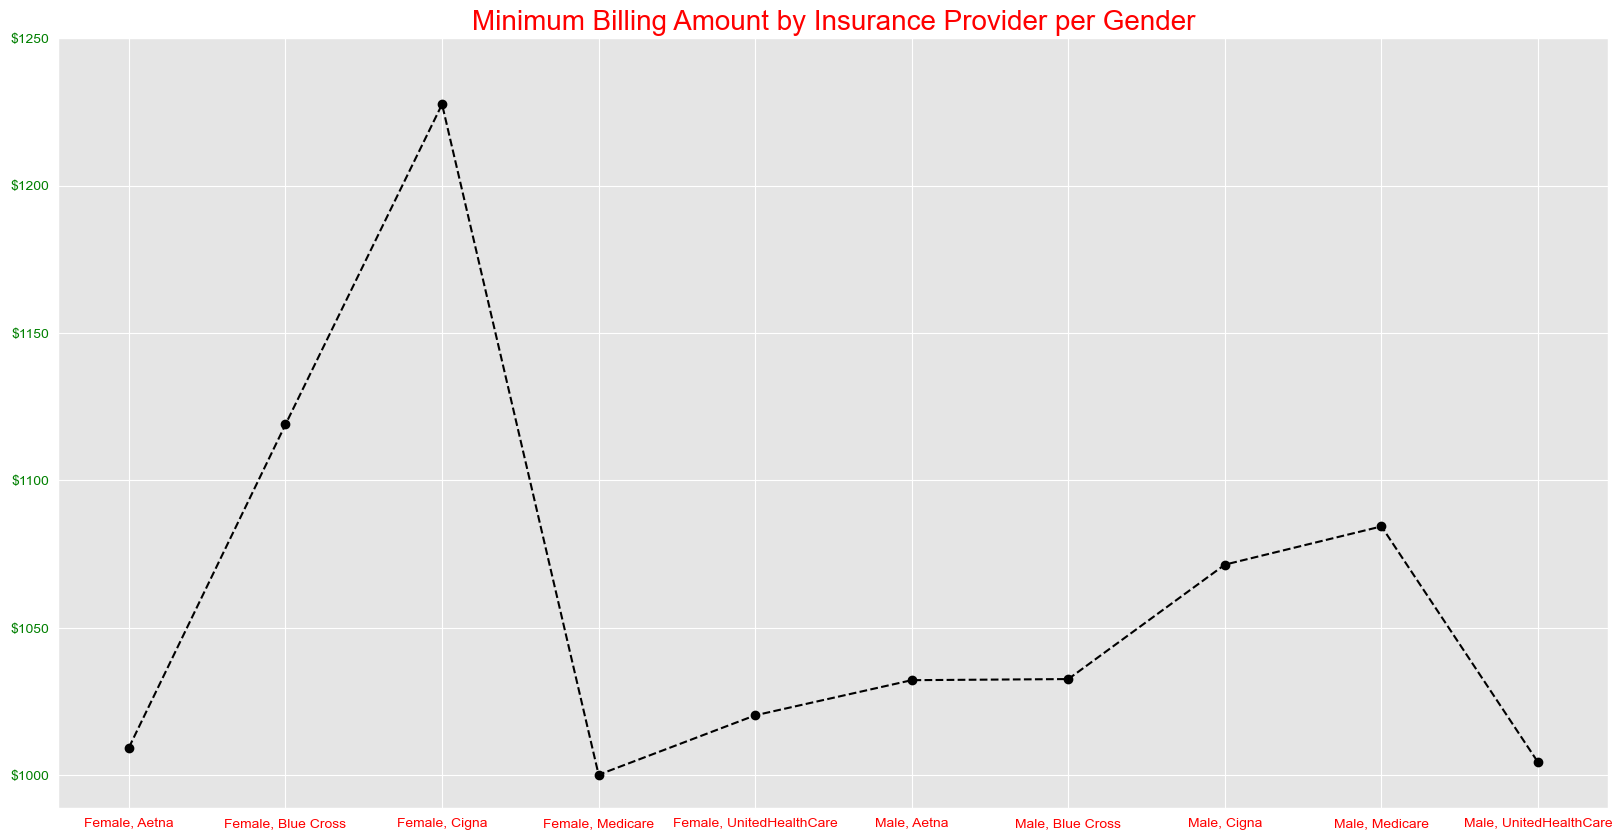

In [99]:
plt.figure(figsize=(20,10))
healthcare.groupby(["Gender", "Insurance Provider"])["Billing Amount"].min().plot(kind="line", linestyle="--", marker="o", label="line with marker", color="black"),
plt.title("Minimum Billing Amount by Insurance Provider per Gender", color="red", fontsize=20),
ticks = list(range(1000,1300,50))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xlabel(""),
plt.xticks([0,1,2,3,4,5,6,7,8,9], ["Female, Aetna", "Female, Blue Cross", "Female, Cigna", "Female, Medicare", "Female, UnitedHealthCare", "Male, Aetna", "Male, Blue Cross", "Male, Cigna", "Male, Medicare", "Male, UnitedHealthCare"], color="red"),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("Medicare is the most affordable Insurance Provider for females per day and United Health Care is the most affordable for males.")

### Billing Amounts By Admission Type

In [64]:
healthcare.groupby("Admission Type")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Admission Type,,,
Elective,1004.416897,25891.832668,49985.973068
Emergency,1000.180837,24708.511933,49995.902283
Urgent,1032.263087,25960.833557,49994.984740


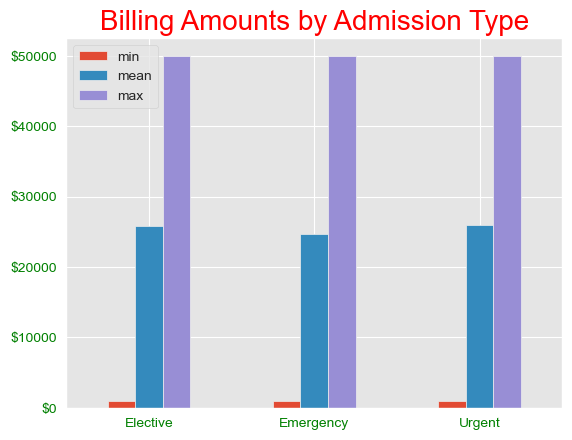

In [88]:
healthcare.groupby("Admission Type")["Billing Amount"].agg(["min", "mean", "max"]).plot(kind="bar", rot=0),
plt.title("Billing Amounts by Admission Type", color="red", fontsize=20),
ticks = list(range(0,60000,10000))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xlabel(""),
plt.xticks(color="green"),
sns.set_style("darkgrid"),
style.use("ggplot")

### Billing Amounts By Admission Type By Gender

In [66]:
healthcare.groupby(["Gender", "Admission Type"])["Billing Amount"].agg(["min", "mean", "max"])

min          mean           max
Gender Admission Type                                         
Female Elective        1020.337790  26164.256544  49985.973068
       Emergency       1000.180837  24698.519068  49974.299138
       Urgent          1042.981212  25612.279493  49921.373365
Male   Elective        1004.416897  25612.946802  49936.073748
       Emergency       1032.640280  24718.714732  49995.902283
       Urgent          1032.263087  26325.584762  49994.984740

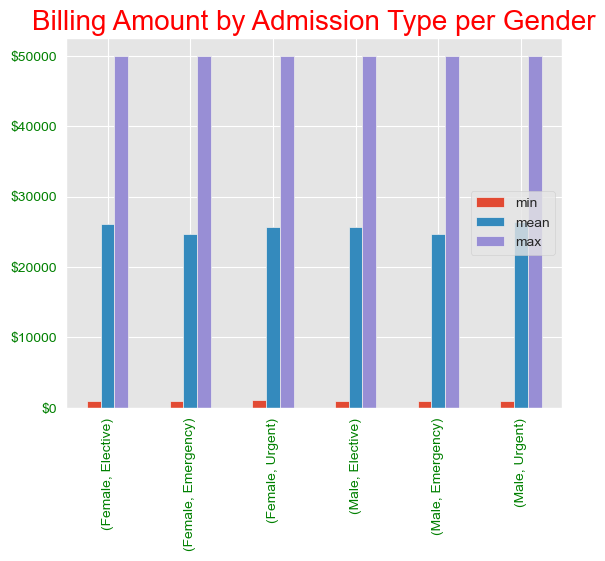

In [67]:
healthcare.groupby(["Gender", "Admission Type"])["Billing Amount"].agg(["min", "mean", "max"]).plot(kind="bar"),
plt.title("Billing Amount by Admission Type per Gender", color="red", fontsize=20),
plt.legend(loc=5),
ticks = list(range(0,60000,10000))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.ylabel(""),
plt.xticks(color="green"),
plt.xlabel(""),
sns.set_style("darkgrid"),
style.use("ggplot")

### Billing Amounts By Medication

In [68]:
healthcare.groupby("Medication")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Medication,,,
Aspirin,1036.079068,25795.641295,49994.984740
Ibuprofen,1009.417327,25439.097865,49957.997600
Lipitor,1032.640280,26126.263179,49974.806592
Paracetamol,1000.180837,25145.410639,49995.902283
Penicillin,1046.985159,25086.518686,49974.160458


##### Minimum Billing Amount By Medication

The percentage of the lowest Billing Amount by Medication is Penicillin.


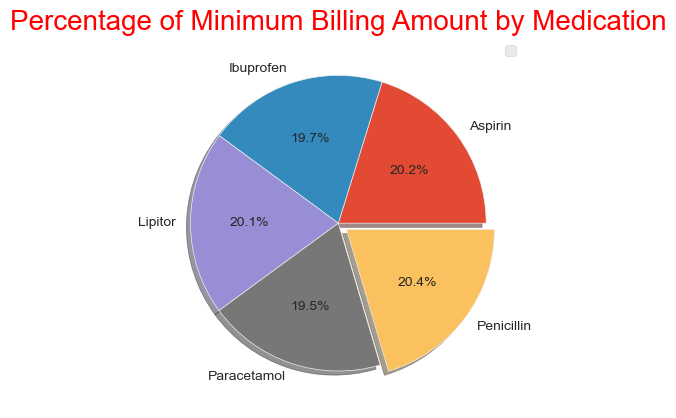

In [69]:
e = [0, 0, 0, 0, 0.07]
healthcare.groupby("Medication")["Billing Amount"].agg(["min"]).plot(kind="pie", shadow=True, explode=e, subplots=True, autopct="%1.1f%%"),
plt.title("Percentage of Minimum Billing Amount by Medication", color="red", fontsize=20),
plt.legend(""),
plt.ylabel(""),
plt.xlabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The percentage of the lowest Billing Amount by Medication is Penicillin.")

### Billing Amounts By Medication and Gender

In [70]:
healthcare.groupby(["Gender", "Medication"])["Billing Amount"].agg(["min", "mean", "max"])

min          mean           max
Gender Medication                                          
Female Aspirin      1036.079068  25714.095927  49974.299138
       Ibuprofen    1009.417327  25955.390215  49904.302118
       Lipitor      1082.444714  25879.880645  49921.373365
       Paracetamol  1000.180837  25020.325396  49985.973068
       Penicillin   1057.017333  24870.630194  49793.614816
Male   Aspirin      1118.831126  25881.787969  49994.984740
       Ibuprofen    1150.038541  24911.179690  49957.997600
       Lipitor      1032.640280  26376.838409  49974.806592
       Paracetamol  1004.416897  25281.407573  49995.902283
       Penicillin   1046.985159  25297.276747  49974.160458

##### Average Billing Amount By Medication and Gender

This graph is a representation of the average Billing Amount by Medication and Gender.


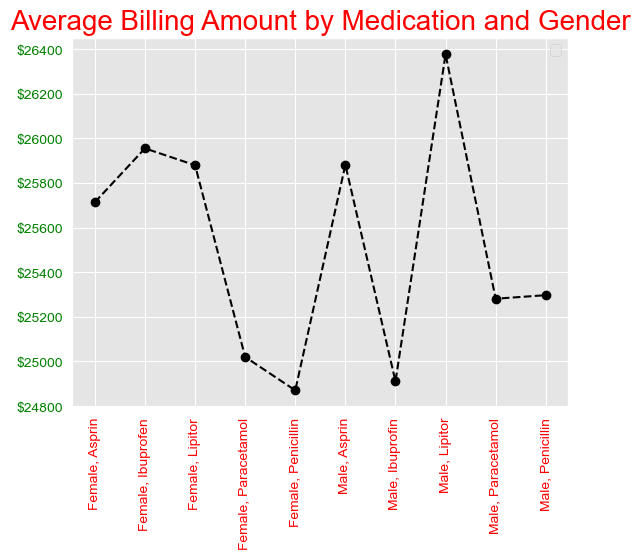

In [71]:
healthcare.groupby(["Gender", "Medication"])["Billing Amount"].agg(["mean"]).plot(kind="line", linestyle="--", marker="o", label="line with marker", color="black", rot=90),
plt.title("Average Billing Amount by Medication and Gender", color="red", fontsize=20),
plt.xticks([0,1,2,3,4,5,6,7,8,9], ["Female, Asprin", "Female, Ibuprofen", "Female, Lipitor", "Female, Paracetamol", "Female, Penicillin", "Male, Asprin", "Male, Ibuprofin", "Male, Lipitor", "Male, Paracetamol", "Male, Penicillin"], color="red"),
ticks = list(range(24800,26500,200))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.legend(""),
plt.xlabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("This graph is a representation of the average Billing Amount by Medication and Gender.")

In [72]:
healthcare.groupby("Test Results")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Test Results,,,
Abnormal,1000.180837,25537.998284,49995.902283
Inconclusive,1009.417327,25677.754136,49994.984740
Normal,1032.263087,25332.949312,49974.806592


##### Minimum Billing Amount By Test Results

The cheapest Billing Amount by Test Results are the abnormal test results.


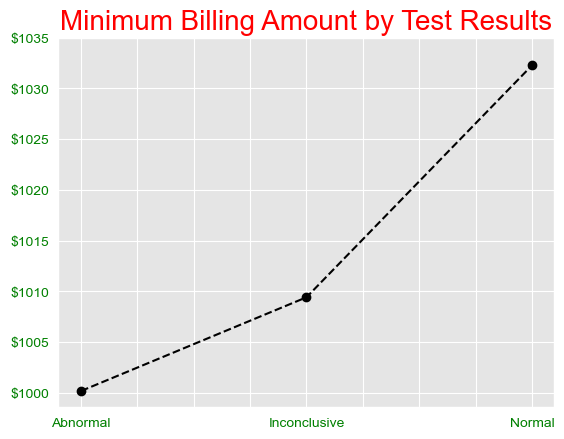

In [73]:
healthcare.groupby("Test Results")["Billing Amount"].min().plot(kind="line", linestyle="--", marker="o", label="line with marker", color="black"),
plt.title("Minimum Billing Amount by Test Results", color="red", fontsize=20),
ticks = list(range(1000,1040,5))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xlabel(""),
plt.xticks(color="green"),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The cheapest Billing Amount by Test Results are the abnormal test results.")

### Billing Amounts By Test Results And Gender

In [74]:
healthcare.groupby(["Gender", "Test Results"])["Billing Amount"].agg(["min", "mean", "max"])

min          mean           max
Gender Test Results                                         
Female Abnormal      1000.180837  25511.644522  49974.299138
       Inconclusive  1009.417327  25322.143855  49985.973068
       Normal        1036.079068  25621.717577  49898.231558
Male   Abnormal      1004.416897  25563.988546  49995.902283
       Inconclusive  1118.831126  26059.231074  49994.984740
       Normal        1032.263087  25033.559273  49974.806592

##### Minimum Billing Amount By Test Results And Gender

The lowest billing amount by test results and gender for both male and females are the abnormal test results.


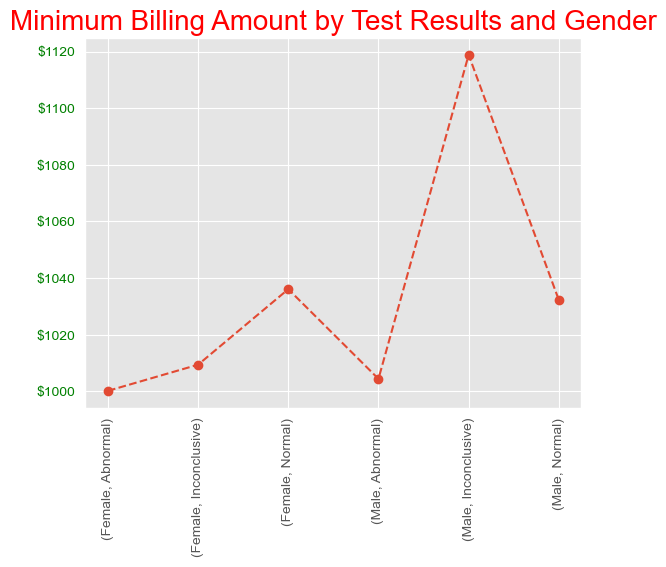

In [106]:
healthcare.groupby(["Gender", "Test Results"])["Billing Amount"].min().plot(kind="line", linestyle="--", marker="o", label="line with marker", rot=90),
plt.title("Minimum Billing Amount by Test Results and Gender", fontsize=20, color="red"),
ticks = list(range(1000,1140,20))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xlabel(""),
sns.set_style("darkgrid"), 
style.use("ggplot"),
print("The lowest billing amount by test results and gender for both male and females are the abnormal test results.")

### Billing Amounts By Admission Year

In [76]:
healthcare.groupby("Admission Year")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Admission Year,,,
2018,1032.263087,24828.796118,49995.902283
2019,1020.337790,25392.181691,49957.997600
2020,1042.981212,25820.161465,49994.984740
2021,1009.417327,25413.219396,49974.160458
2022,1000.180837,25828.321505,49951.261761
2023,1032.640280,25160.776670,49929.798726


##### Percentage Of Minimum Billing Amount By Admission Year

The year 2020 had the highest percentage of minimum Billing Amounts


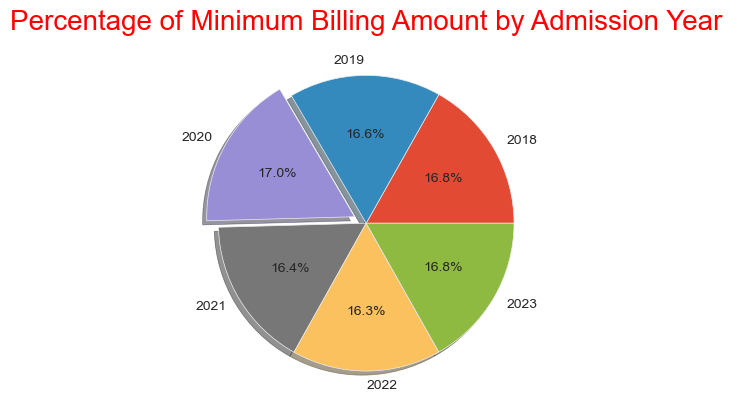

In [77]:
e = [0, 0, 0.09, 0, 0, 0]
healthcare.groupby("Admission Year")["Billing Amount"].min().plot(kind="pie", autopct="%1.1f%%", shadow=True, explode=e),
plt.title("Percentage of Minimum Billing Amount by Admission Year", color="red", fontsize=20),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The year 2020 had the highest percentage of minimum Billing Amounts")

### Billing Amounts By Admission Year And Gender

In [78]:
healthcare.groupby(["Gender", "Admission Year"])["Billing Amount"].agg(["min", "mean", "max"])

min          mean           max
Gender Admission Year                                         
Female 2018            1273.563489  25321.299546  49701.365998
       2019            1020.337790  25332.053737  49947.562815
       2020            1042.981212  25702.516145  49985.973068
       2021            1009.417327  25530.884530  49898.231558
       2022            1000.180837  26066.333831  49951.261761
       2023            1036.079068  24620.782185  49929.798726
Male   2018            1032.263087  24182.150397  49995.902283
       2019            1084.422303  25454.988921  49957.997600
       2020            1068.419659  25937.576784  49994.984740
       2021            1104.544422  25285.689406  49974.160458
       2022            1004.416897  25584.286599  49898.208277
       2023            1032.640280  25674.684464  49886.805181

##### Minimum Billing Amount By Gender And Admissioin Year

The year 2022 saw the lowest minimum billing amount by gender and admission year for males and females.


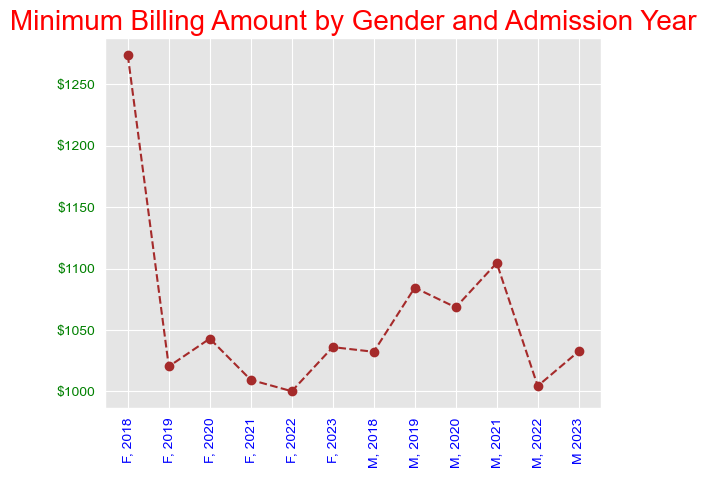

In [79]:
healthcare.groupby(["Gender", "Admission Year"])["Billing Amount"].min().plot(kind="line", linestyle="--", marker="o", label="line with marker", color="brown", rot=90),
plt.title("Minimum Billing Amount by Gender and Admission Year", fontsize=20, color="red"),
ticks = list(range(1000, 1300, 50))
plt.yticks(ticks, [f"${x}" for x in ticks], color="g"),
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ["F, 2018", "F, 2019", "F, 2020", "F, 2021", "F, 2022", "F, 2023", "M, 2018", "M, 2019", "M, 2020", "M, 2021", "M, 2022", "M 2023"], color="b"),
plt.xlabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The year 2022 saw the lowest minimum billing amount by gender and admission year for males and females.")

### Billing Amounts By Admission Month

In [80]:
healthcare.groupby("Admission Month")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Admission Month,,,
April,1070.015270,25107.664268,49853.765117
August,1046.985159,24766.834340,49954.968325
December,1032.263087,26396.662244,49995.902283
February,1036.079068,25567.368994,49929.798726
January,1032.640280,25151.063565,49957.997600
July,1166.771319,25974.127041,49951.261761
June,1068.419659,25618.322576,49885.406194
March,1265.550115,24860.896221,49930.031601
May,1071.456127,25743.687071,49974.299138


##### Maximum Billing Amount By Admission Month 

(Text(0.5, 0, ''),)

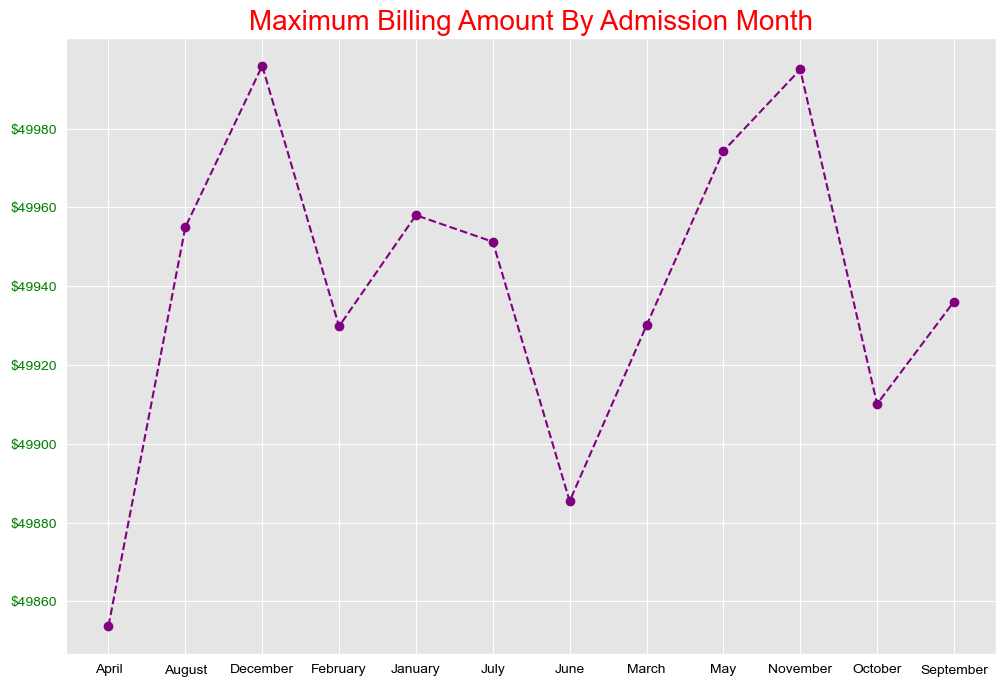

In [133]:
plt.figure(figsize=(12,8))
healthcare.groupby("Admission Month")["Billing Amount"].max().plot(kind="line", linestyle="--", marker="o", label="line with marker", color="purple"),
plt.title("Maximum Billing Amount By Admission Month", fontsize=20, color="red"),
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], ["April", "August", "December", "February", "January", "July", "June", "March", "May", "November", "October", "September"], color="black"),
ticks = list(range(49860,50000,20))
plt.yticks(ticks, [f"${x}" for x in ticks], color="g"),
plt.xlabel(""),

### Billing Amounts By Gender And Admission Month

In [81]:
healthcare.groupby(["Gender", "Admission Month"])["Billing Amount"].agg(["min", "mean", "max"])

min          mean           max
Gender Admission Month                                         
Female April            1070.015270  25066.162303  49678.364603
       August           1256.479072  24704.373613  49803.714739
       December         1171.420659  25943.224927  49932.901816
       February         1036.079068  26033.026230  49929.798726
       January          1082.444714  24346.065832  49947.562815
       July             1166.771319  25744.113449  49951.261761
       June             1118.997433  25212.291547  49874.622225
       March            1301.154352  25305.543967  49904.302118
       May              1145.877641  26117.539771  49974.299138
       November         1009.417327  25453.965374  49985.973068
       October          1227.603915  26395.646526  49891.402385
       September        1000.180837  25572.500463  49780.122625
Male   April            1280.553303  25152.986065  49853.765117
       August           1046.985159  24830.942711  49954.968325
       December         1032.263087  26884.721622  49995.902283
       February         1185.213879  25087.121976  49909.182206
       January          1032.640280  26038.988201  49957.997600
       July             1224.768329  26185.462035  49792.100091
       June             1068.419659  26015.673607  49885.406194
       March            1265.550115  24412.043768  49930.031601
       May              1071.456127  25397.210313  49900.083511
       November         1443.238539  24898.277983  49994.984740
       October          1004.416897  25237.012202  49910.077615
       September        1084.422303  26448.178162  49936.073748

##### Average Billing Amount by Gender And Admission Month

The month of October has the highest average billing amount for the female gender and the month of December has the highest average billing amount for the males.


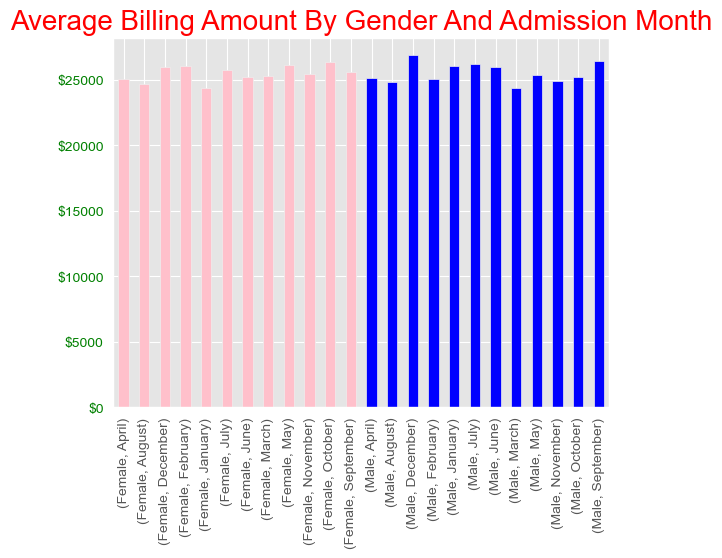

In [116]:
c = ["pink", "pink", "pink", "pink", "pink", "pink", "pink", "pink", "pink", "pink", "pink", "pink", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue", "blue"]
healthcare.groupby(["Gender", "Admission Month"])["Billing Amount"].mean().plot(kind="bar", color=c),
plt.title("Average Billing Amount By Gender And Admission Month", color="red", fontsize=20),
ticks = list(range(0,30000,5000))
plt.yticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.xlabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The month of October has the highest average billing amount for the female gender and the month of December has the highest average billing amount for the males.")

### Billing Amounts By Admission Day

In [82]:
healthcare.groupby("Admission Day")["Billing Amount"].agg(["min", "mean", "max"])

,min,mean,max
Admission Day,,,
Friday,1104.544422,25666.449305,49954.968325
Monday,1042.981212,25164.158684,49974.806592
Saturday,1068.419659,25648.138602,49974.299138
Sunday,1036.079068,25260.071719,49994.984740
Thursday,1032.263087,25765.733770,49985.973068
Tuesday,1000.180837,25618.738308,49995.902283
Wednesday,1004.416897,25486.530418,49885.406194


##### Percentage Of Minimum Billing Amount By Admission Day

The highest percentage of the minimum billing amount by admission day is on Fridays.


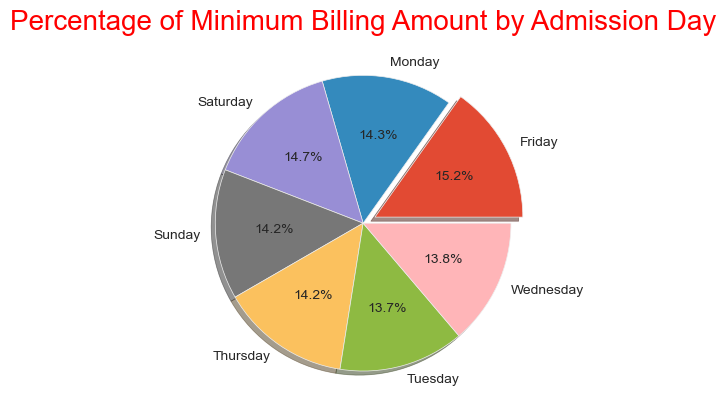

In [122]:
e = [0.09, 0, 0, 0, 0, 0, 0]
healthcare.groupby("Admission Day")["Billing Amount"].min().plot(kind="pie", shadow=True, autopct="%1.1f%%", explode=e),
plt.title("Percentage of Minimum Billing Amount by Admission Day", color="red", fontsize=20),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The highest percentage of the minimum billing amount by admission day is on Fridays.")

### Billing Amounts By Gender And Admission Day

In [83]:
healthcare.groupby(["Gender", "Admission Day"])["Billing Amount"].agg(["min", "mean", "max"])

min          mean           max
Gender Admission Day                                         
Female Friday         1205.002345  25362.755717  49898.231558
       Monday         1042.981212  25334.943110  49932.901816
       Saturday       1152.310743  26235.931184  49974.299138
       Sunday         1036.079068  25319.023886  49951.261761
       Thursday       1118.997433  25855.190285  49985.973068
       Tuesday        1000.180837  25264.104968  49929.798726
       Wednesday      1243.972898  25028.906278  49701.365998
Male   Friday         1104.544422  25968.846903  49954.968325
       Monday         1150.038541  24983.615147  49974.806592
       Saturday       1068.419659  25027.595113  49900.083511
       Sunday         1276.074004  25199.579437  49994.984740
       Thursday       1032.263087  25679.484858  49898.927543
       Tuesday        1046.985159  26005.145155  49995.902283
       Wednesday      1004.416897  25958.414802  49885.406194

##### Average Billing Amount By Gender And Admission Day

The highest average billing amount by gender and admission day is Friday for the males and Saturday for the females.


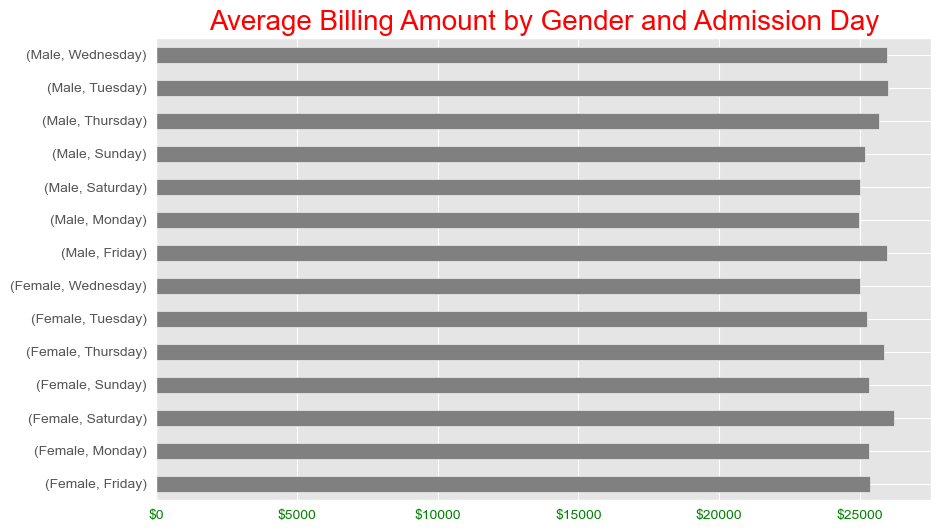

In [132]:
plt.figure(figsize=(10,6))
healthcare.groupby(["Gender", "Admission Day"])["Billing Amount"].mean().plot(kind="barh", color="grey"),
plt.title("Average Billing Amount by Gender and Admission Day", color="red", fontsize=20),
ticks = list(range(0,30000,5000))
plt.xticks(ticks, [f"${x}" for x in ticks], color="green"),
plt.ylabel(""),
sns.set_style("darkgrid"),
style.use("ggplot"),
print("The highest average billing amount by gender and admission day is Friday for the males and Saturday for the females.")